                                                        DỰ ĐOÁN GIÁ NHÀ NĂM 2014-2015

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
%matplotlib inline

In [138]:
dataset=pd.read_csv("house_data.csv")
df=dataset.copy()

In [139]:
df.shape

(21613, 21)

In [140]:
# Hiển thị bảng 1 cách đầy đủ
pd.pandas.set_option('display.max_columns',None)

In [141]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [122]:
# Tỉ lệ null của các biến
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

NX: Các biến không có hiện tượng null

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [124]:
# Hiển thị giá trị duy nhất của các cột bathrooms, bedrooms, floors, waterfront
cols = ['bathrooms','bedrooms', 'floors','waterfront']
for i in cols:
    print(f"{i}")
    print(f"{df[i].unique()}")
    print("\n")

bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


floors
[1.  2.  1.5 3.  2.5 3.5]


waterfront
[0 1]




In [143]:
#Xử lý dữ liệu bathrooms và floors là các số không nguyên 
df['bathrooms'] = round(df['bathrooms'])
df['floors'] = round(df['floors'])

In [126]:
#  Độ tương quan giữa các biến.
df.corr()

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\588228385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,-0.005881,-0.012258,-0.132109,0.017054,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.518912,0.702035,0.089661,0.244906,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.489609,0.576671,0.031703,0.177778,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.005881,0.518912,0.489609,1.000000,0.701784,0.089988,0.326466,0.065428,0.202647,-0.066685,0.591269,0.599360,0.334909,0.377433,0.069322,-0.144088,0.049235,0.149157,0.497484,0.086952
sqft_living,-0.012258,0.702035,0.576671,0.701784,1.000000,0.172826,0.321987,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.089988,0.172826,1.000000,-0.001947,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.017054,0.244906,0.177778,0.326466,0.321987,-0.001947,1.000000,0.025839,0.027971,-0.223259,0.407675,0.488411,-0.245659,0.381396,0.015424,-0.022506,0.064603,0.088845,0.242730,-0.010895
waterfront,-0.002721,0.266369,-0.006582,0.065428,0.103818,0.021604,0.025839,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.202647,0.284611,0.074710,0.027971,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.066685,-0.058753,-0.008958,-0.223259,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Biến id và zipcode tương quan với biến price thấp và cũng không có ý nghĩa giải thích cho mô hình nên ta sẽ loại nó

Các biến bathrooms, sqft_living, sqdt_above, sqft_living15 có mối tương quan cao với biến phụ thuộc giá nhà ( tương quan trên 0.5)

Các biến còn lại thì có mức độ tương quan yếu

In [144]:
# Bỏ biến id và zipcode
df.drop('id', inplace= True, axis=1)
df.drop('zipcode', inplace= True, axis=1)

Làm tròn giá trị biến bathrooms và floors với hàm round() thành số nguyên gần nhất nhằm giúp thông tin có thể đáng tin cậy nhất

In [128]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.058715,2079.899736,1.510697e+04,1.534956,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.755524,918.440897,4.142051e+04,0.554742,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [145]:
# Chuyển dữ liệu biến date thành kiểu dữ liệu mô hình có thể dự đoán
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y%m%dT%H%M%S'))
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

Biến date có kiểu dữ liệu object ở dạng không phải kiểu dữ liệu ngày tháng năm chuẩn nên ta sẽ chuyển đổi các giá trị các giá trị của biến date từ định dnagj chuỗi sang định dạng ngày tháng năm chuẩn. Định dạng chuỗi là "%Y%m%dT%H%M%S", tương ứng với "năm-tháng-ngàyTgiờ-phút-giây".

Sau đó ta sẽ chuyển dữ liệu date định dạng đúng chuẩn thành kiểu dữ liệu giúp mô hình có thể dự đoán hiệu quả được

In [146]:
# Tạo biến age
df['age'] = pd.to_datetime(df['date']).dt.year - df['yr_built']
df['age'] = df['age'].apply(lambda age: age if age > 0 else 0) # gắn giá trị age âm về 0

Chúng ta thêm biến  của ngôi nhà khi được bán vào mô hình.Vì tuổi một ngôi nhà cũng sẽ góp phần định giá một nhà. Một ngôi nhà càng mới thì giá trị sẽ càng cao. Vì khi mua nhà cũ, có tuổi thọ lâu ngôi nhà sẽ xuống cấp và sẽ phải tốn thêm chi phí để tiến hành nâng cấp hoặc sửa chữa trước khi vào ở

In [147]:
#  Chuyển 'yr_renovated' thành biến phân loại với 2 nhóm là có có tu sửa và không tu sửa với 
# 0: ko tu sửa  &  1: tu sửa
df['renovation_status'] = pd.cut(df['yr_renovated'], bins=[-1,0,df['yr_renovated'].max()], labels=['no_renovation', 'renovated'])


In [148]:
# Bỏ cột 'yr_renovated', 'yr_built','date'
df.drop('yr_renovated', inplace= True, axis=1)
df.drop('yr_built', inplace= True, axis=1)
df.drop('date', inplace= True, axis=1)

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\3332665478.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v],kde=False,color='purple')


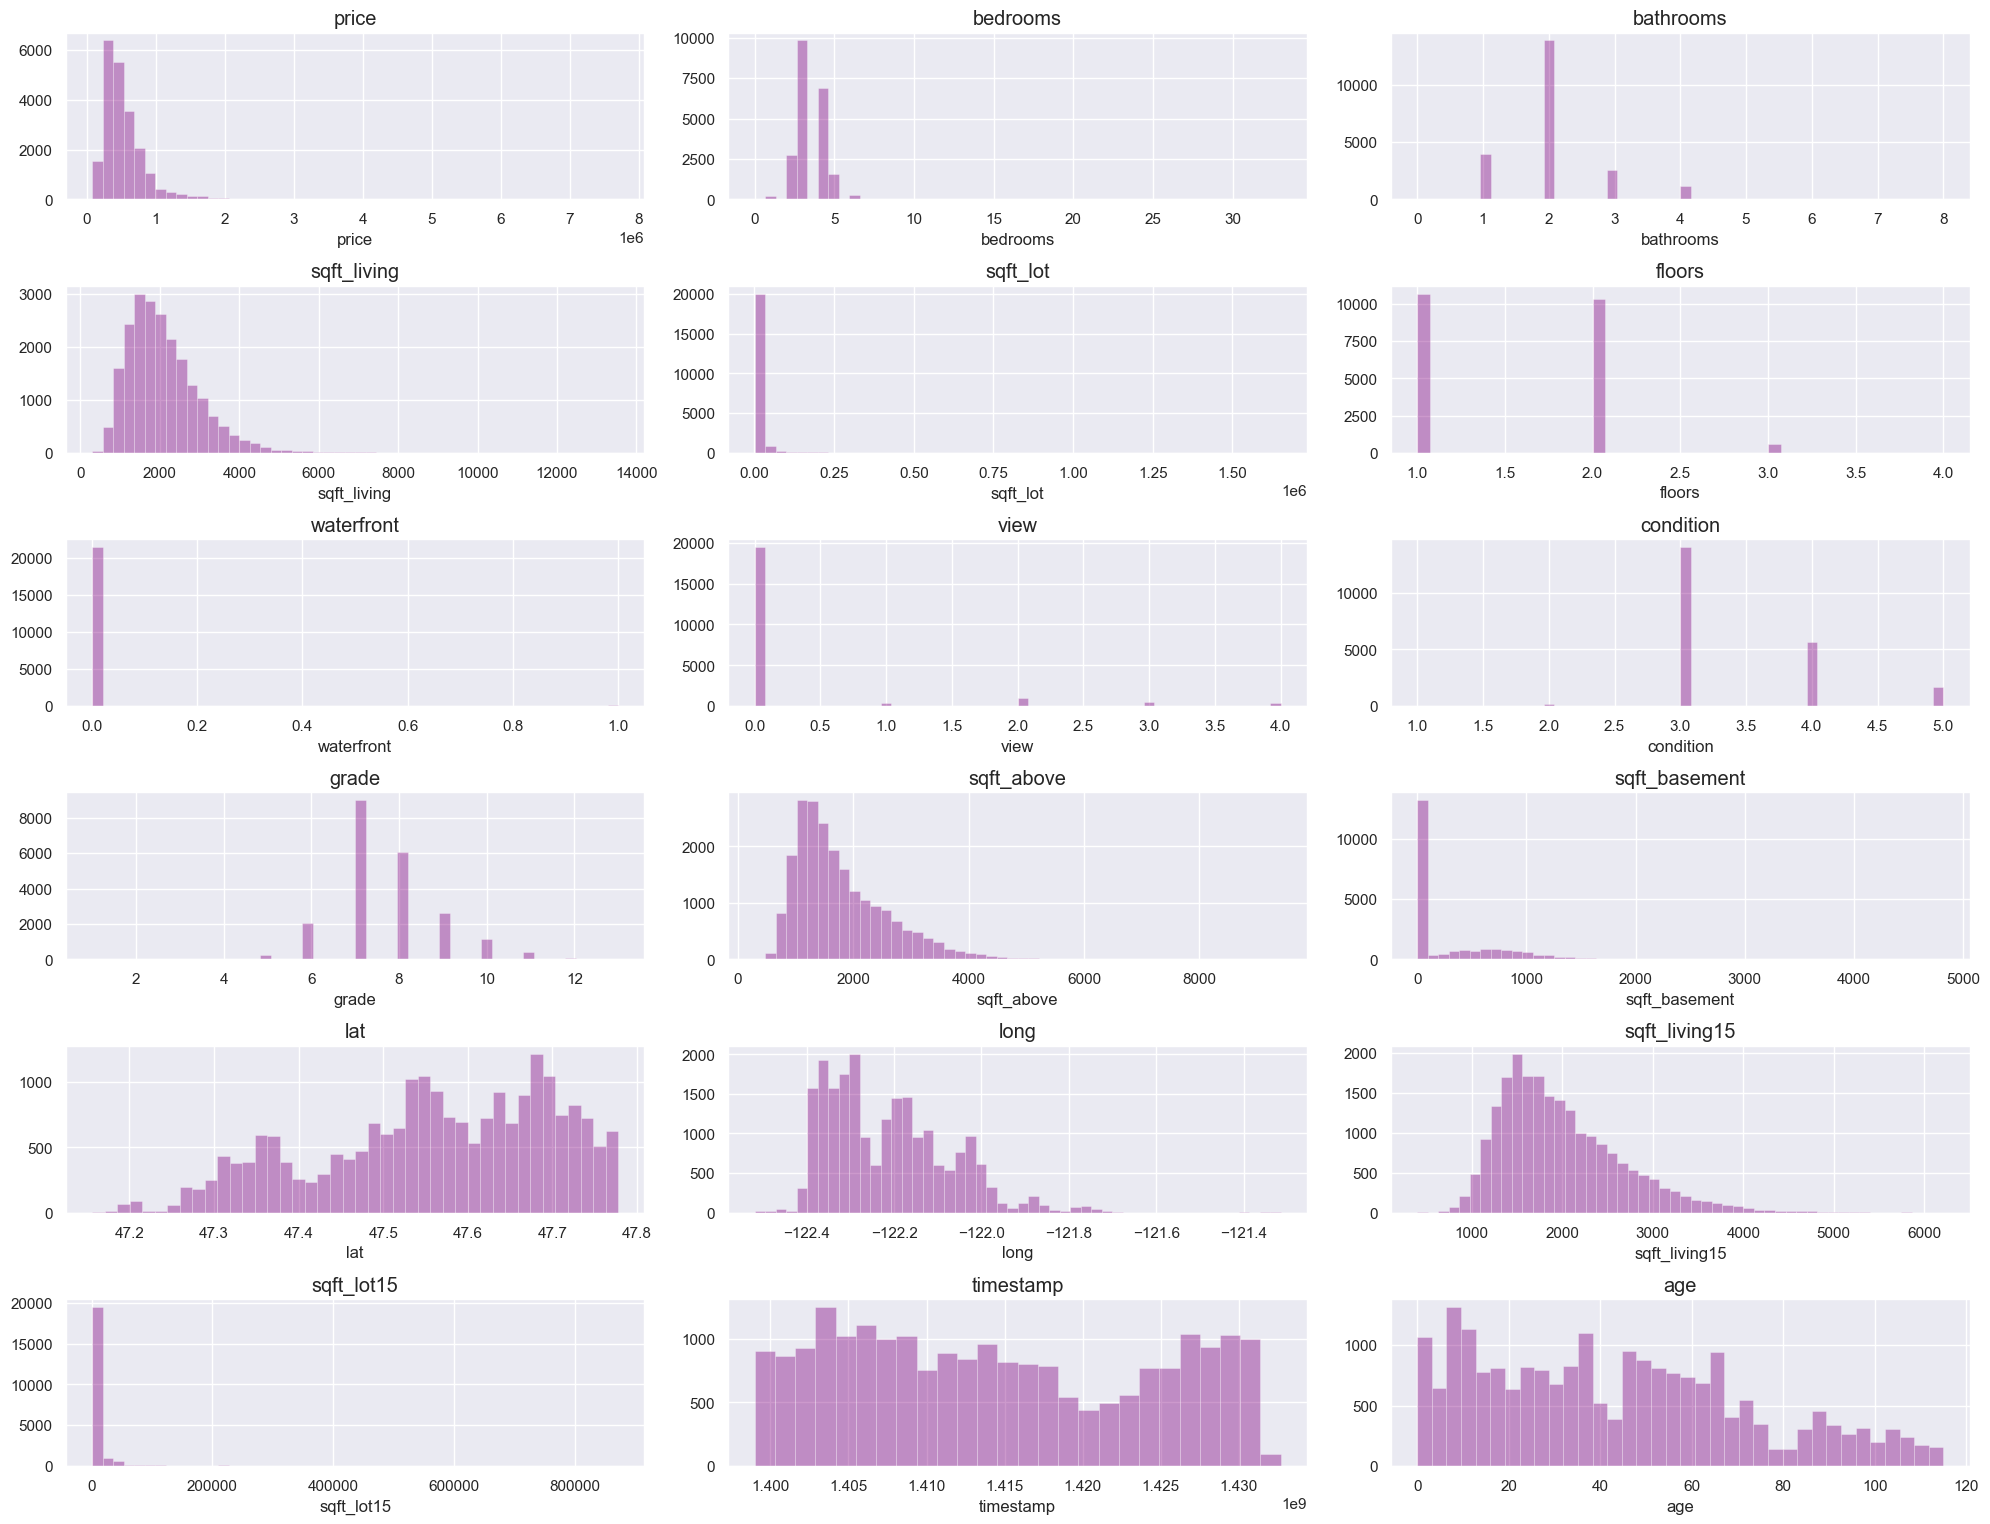

In [149]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))
for i, v in enumerate(numeric_columns):
     sns.set_style("darkgrid")
     plt.subplot(10,3,i+1)   
     sns.distplot(df[v],kde=False,color='purple')
     plt.tight_layout()
     plt.title(v)   

Ta thấy các biến dữ liệu rời rạc như: 'bedrooms','bathrooms','floors','waterfront','view','condition','grade'  bị mất cân bằng dữ liệu

Các biểu đồ của  các biến như price, sqft_living, sqft_lot, sqft_above,sqft_basement, sqft_living15  phân phối bị mất cân xứng cụ thể là dữ liệu lệch phải

In [134]:
# số lượng các giá trị độc lập của biến dữ liệu rời rạc
discrete_numerical=['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
for i in discrete_numerical:
    print("\n",i)
    print(df[i].value_counts())


 bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

 bathrooms
2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

 floors
1.0    10680
2.0    10312
3.0      613
4.0        8
Name: floors, dtype: int64

 waterfront
0    21450
1      163
Name: waterfront, dtype: int64

 view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

 condition
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

 grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


Ta sẽ phân loại lại các giá trị độc lập thành các nhóm sao cho số lượng các giá trị độc lập trong các nhóm là cân bằng hơn

In [150]:
# Tạo danh sách các giá trị để phân loại cho biến bedrooms
bins = [0, 3, 6, 33]
# Tạo danh sách các nhãn cho từng nhóm
labels = ['1', '2', '3']
# Thực hiện phân loại các giá trị độc lập và lưu vào một cột mới 
df['bedrooms'] = pd.cut(df['bedrooms'], bins=bins, labels=labels)


Với dữ liệu bedrooms, ta sẽ phân loại lại các giá trị độc lập thành các nhóm nhằm sao cho số lượng các giá trị độc lập trong các nhóm là cân bằng hơn.

Với biến bedrooms, sau khi phân thành 3 loại, biểu đồ biến bedrooms sẽ có dạng:

BEDROOM

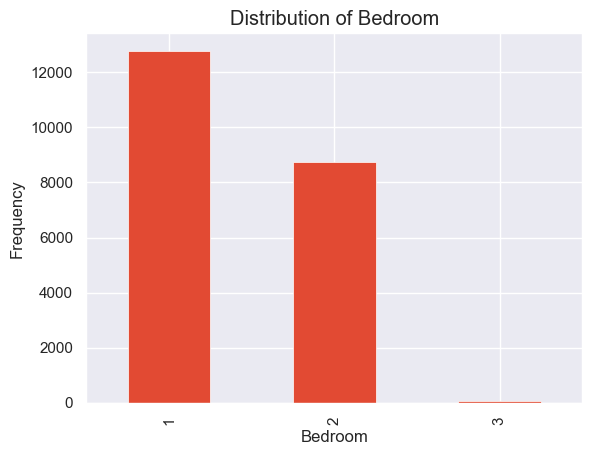

In [151]:
# Tạo histogram cho biến "bedroom_group"
fig, ax = plt.subplots()
df['bedrooms'].value_counts().sort_index().plot(kind='bar', ax=ax)
# Thiết lập các thông số trên trục x, y
ax.set_xlabel('Bedroom')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Bedroom')
# Hiển thị biểu đồ
plt.show()


BATHROOMS

Với biến bathrooms có khoảng 97% giá trị nằm trong khoảng từ 0 đến 4, và khoảng 3% giá trị nằm trong khoảng từ 5 đến 8 nên hườn giải quyết 
là sẽ đưa các giá trị xuất hiện ít như 5.0, 6.0, 7.0, 8.0) về một giá trị chung 

Biểu đồ bathrooms sau khi phân loại có dạng như sau:

In [152]:
def replace_rare_values(x):
    if x in [5, 6, 7, 8]:
        return 5
    else:
        return x
df['bathrooms'] = df['bathrooms'].apply(replace_rare_values)


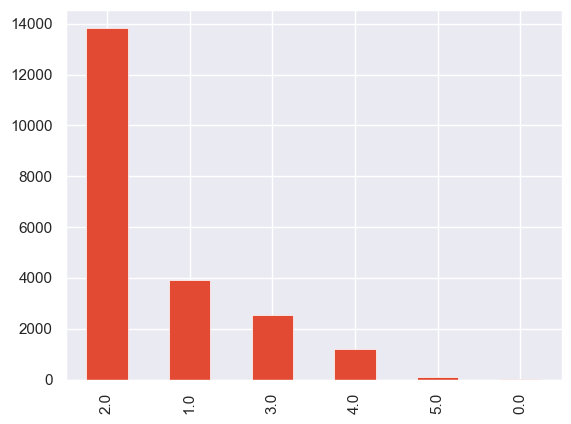

In [153]:
df['bathrooms'].value_counts().plot.bar()
ax.set_xlabel('bathrooms')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of bathrooms')
plt.show()

CHUẨN HÓA DỮU LIỆU

Việc đồng nhất phương pháp chuẩn hóa giữa biến đầu vào và biến đầu ra giúp tăng độ chính xác và giảm độ nhiễu của mô hình  hồi quy tuyến tính mà nhóm sẽ chạy trong bài. Có rất nhiều phương pháp chuẩn hóa, ở bài này , tác giả sẽ dụng chuẩn hóa bằng phương pháp log.

In [154]:
# Sử dụng phương pháp logarit để làm giảm độ lớn của giá trị gốc và giúp cải thiện phân bố data của biến
df['price'] = np.log(df['price'])

Biến price từ phân phối lệch phải sau khi log sẽ sẽ giúp giảm độ lệch bên trái của biến. Sau khi logarit biến price có sẽ có dạng phân phối như sau:

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\3266986627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Standard Deviation of sc_Salary is 0.5266845190328355 


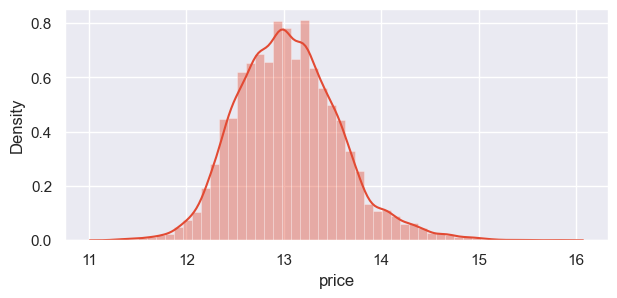

In [155]:
# BIẾN PRICE
plt.figure(figsize=(7,3))
sns.distplot(df['price'])
import statistics
print("Standard Deviation of sc_Salary is % s " 
                % (statistics.stdev(df['price']))) 

Logarit tương tự cho các biến khác:

In [156]:
df['sqft_living'] = np.log(df['sqft_living'])
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_living15'] = np.log(df['sqft_living15'])

Và các biến sau khi logarti sẽ có các dạng như sau:

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\1782133992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'])


Standard Deviation of sqft_living is 0.42480685521099254 


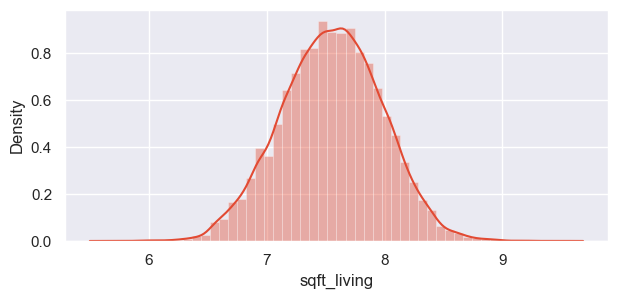

In [157]:
plt.figure(figsize=(7,3))
sns.distplot(df['sqft_living'])
import statistics
print("Standard Deviation of sqft_living is % s " 
                % (statistics.stdev(df['sqft_living']))) 

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\3480931496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_lot'])


Standard Deviation of 'sqft_lot' is 0.9024250928266182 


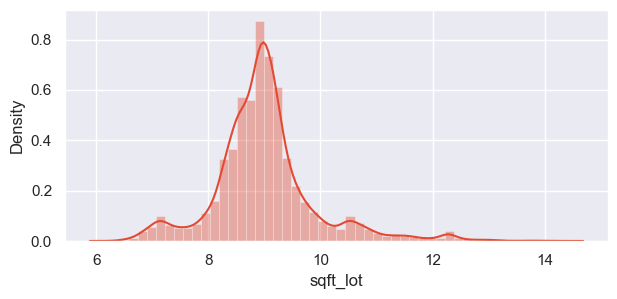

In [158]:
plt.figure(figsize=(7,3))
sns.distplot(df['sqft_lot'])
import statistics
print("Standard Deviation of 'sqft_lot' is % s " 
                % (statistics.stdev(df['sqft_lot']))) 

C:\Users\Admins\AppData\Local\Temp\ipykernel_5716\88482065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_above'])


Standard Deviation of sqft_above is 0.4276305252358428 


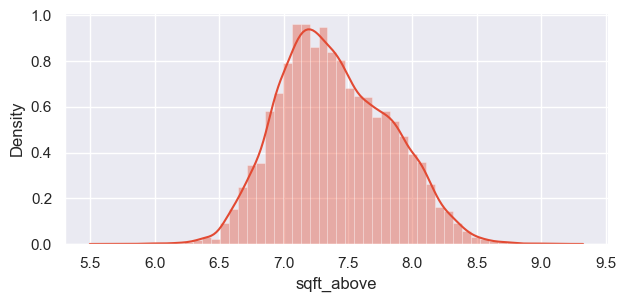

In [159]:
plt.figure(figsize=(7,3))
sns.distplot(df['sqft_above'])
import statistics
print("Standard Deviation of sqft_above is % s " 
                % (statistics.stdev(df['sqft_above']))) 

In [160]:
# do chuẩn hóa bằng log mà biến sqft_basement chứa nhiều giá trị 0 nên ta sẽ loại bỏ sqft_basement để không làm ảnh hưởng đến mô hình
df.drop('sqft_basement', inplace= True, axis=1)

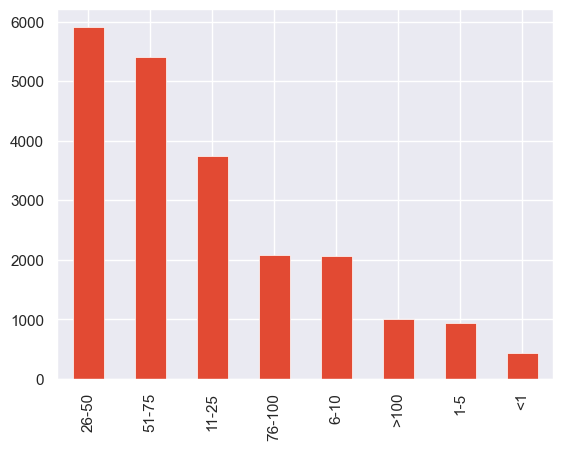

In [161]:
df_linear = df.copy(deep=True)
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age'].value_counts().plot.bar()
plt.show()

Sử dụng boxplot để tìm outlier, dưới đây là boxplot của các biến:

bedrooms


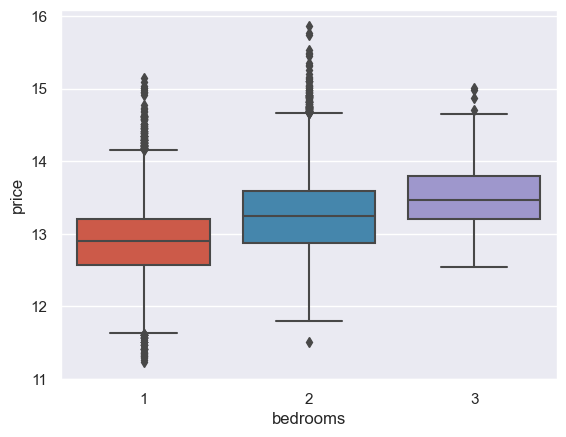

bathrooms


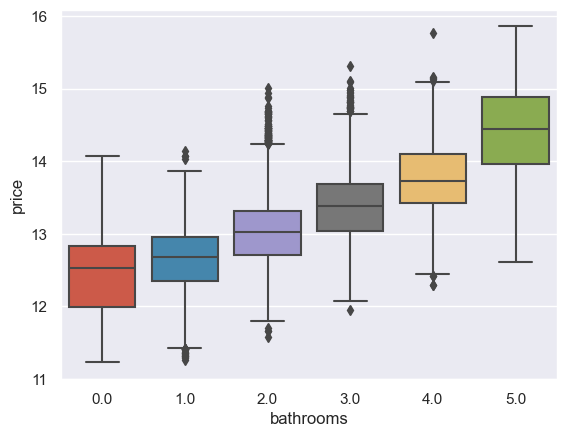

floors


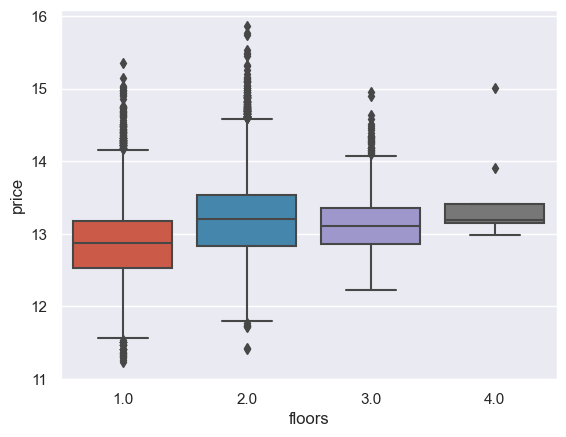

waterfront


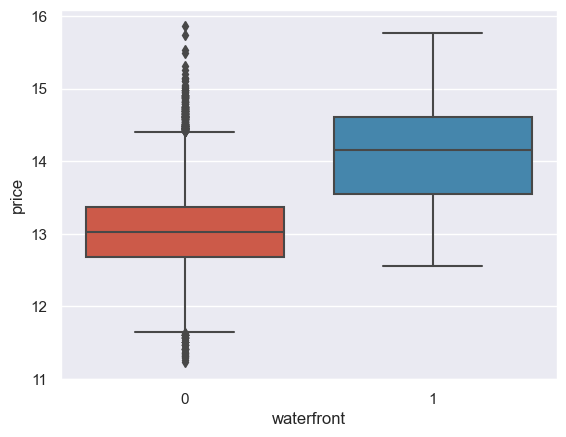

view


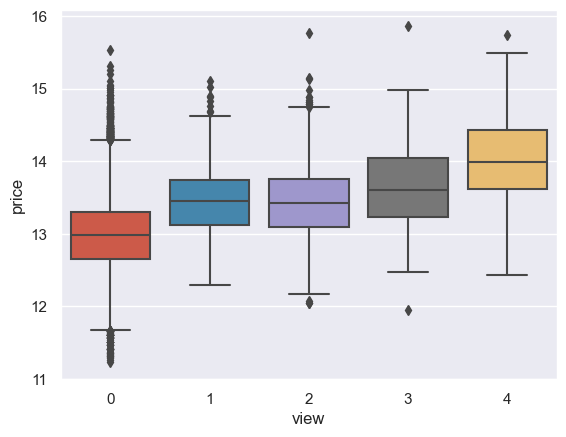

condition


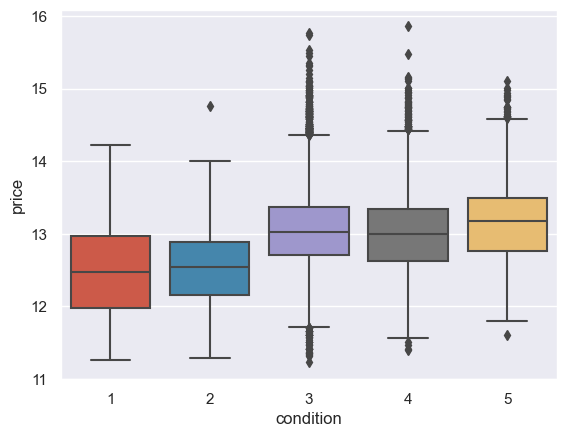

grade


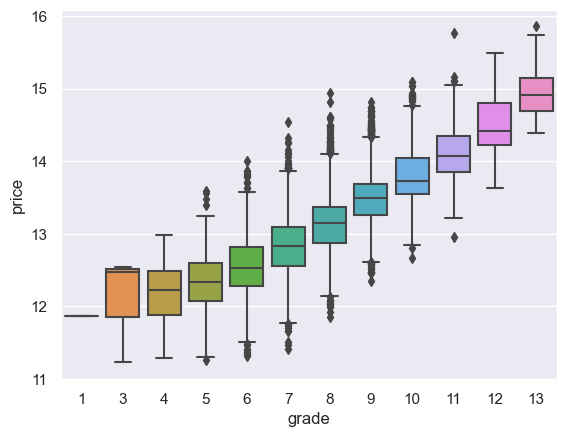

In [162]:
discrete_numerical=['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
for i in discrete_numerical:
    print(i)
    sns.boxplot(x=df[i],y=df['price'])
    plt.show()

Do lượng dữ liệu không lớn nên việc xóa bỏ outlier sẽ khiến tập dữ liệu không có độ tin cậy cao cũng như đảm bảo tính tổng quát hóa của nó trên các tập dữ liệu khác nhau
Sau khi chuẩn hóa dữ liệu có ít outlier hơn nhưng nhìn chung, các biến rời rạc vẫn còn rất nhiều ngoại lai và điều này sẽ ảnh hưởng xấu đến kết quả phân tích và dự đoán của mô hình. 

Mã hóa dữ liệu biến renovation_status và age để mô hình có thể học

In [163]:
# Chuyển đổi biến renovation_status từ giá trị chuỗi sang số
df_linear['renovation_status']=df['renovation_status'].map({'no_renovation':0,'renovated':1}).astype(int)

In [164]:
# Tạo biến giả cho biến age
df_linear = pd.get_dummies(df_linear, columns=['age'])

Do sau khi mã hóa dữ liệu có 1 lượng nhỏ bị mất đi một số thông tin nên ta sẽ tiến hành xử lý loại bỏ các thông tin null

In [165]:
# Xóa các giá trị null sau khi chuẩn hóa
df_linear = df_linear.dropna()

In [166]:
# chuyển dữ liệu category thành kiểu dữ liệu int
df_linear['bedrooms'] = df_linear['bedrooms'].cat.codes

In [167]:
# Gán biến phụ thuộc và các biến độc lập
Y=df_linear['price']
X=df_linear.drop(['price'],axis=1)

CHẠY MÔ HÌNH

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2022)
from sklearn.linear_model import LinearRegression
model_Regression=LinearRegression()

In [169]:
model_Regression.fit(X_train,Y_train)

LinearRegression()

In [170]:
#Dự đoán mô hình dựa trên tập dữ liệu đã training
Y_predict = model_Regression.predict(X_test)

In [172]:
# Hệ số R2
from sklearn.metrics import r2_score
r2_score(Y_predict,Y_test)

0.7122977671463808

Dữ liệu trên nói lên rằng: các biến độc lập giải thích được 71.22% sự biến thiên của biến phụ thuộc. Phần còn lại 28.78% được giải thích bởi các biến ngoài mô hình và sai số ngẫu nhiên.

In [182]:
# Đánh giá mô hình
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import abs
# Mean Absolute Error 
mae = mean_absolute_error(Y_test,Y_predict)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Y_test,Y_predict))
# Mean Absolute Percentage Error 
mape = np.mean(abs((Y_test-Y_predict)/Y_test))*100
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 0.18966953536527034
RMSE: 0.2463779769963561
MAPE: 1.4551319259588162


Nhìn chung, các giá trị trên khá thấp, điều này cho thấy mô hình được sử dụng dự đoán một cách đáng tin cậy

Các nguyên nhân  có thể khiến mô hình không hiệu quả:
- mẫu dữ liệu chưa đủ lớn
- Có quá nhiều biến ngoại lại, nếu xóa sẽ khiến độ tin cậy của mô hình không được cao
